## Codificación de Variables Categóricas con OneHotEncoding

### Subtask:
Identificar las variables categóricas en `df_transformed` y aplicar `OneHotEncoder` para convertirlas en formato numérico.

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Importar SimpleImputer

# Identificar columnas categóricas
categorical_features = df_transformed.select_dtypes(include='object').columns.tolist()

# Identificar columnas numéricas a mantener
numerical_features_to_keep = df_transformed.select_dtypes(include=np.number).columns.tolist()

print("Columnas categóricas identificadas:")
print(categorical_features)
print("\nColumnas numéricas a mantener:")
print(numerical_features_to_keep)

# Crear un pipeline para el preprocesamiento de características categóricas:
# 1. Imputar valores nulos con 'Missing'
# 2. Aplicar OneHotEncoder (forzando la salida a densa)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # <--- Modificación aquí
])

# Crear un ColumnTransformer para aplicar diferentes transformaciones a diferentes tipos de columnas
# Ahora especificamos explícitamente las columnas numéricas para pasarlas sin transformar
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numerical_features_to_keep) # Pasar las columnas numéricas sin transformar
    ],
    remainder='drop' # Descartar cualquier otra columna no especificada
)

# Crear un pipeline principal que incluya el preprocesador
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Ajustar el pipeline a los datos
pipeline.fit(df_transformed)

# Aplicar el preprocesamiento al DataFrame
df_encoded_array = pipeline.transform(df_transformed)

# Obtener los nombres de las nuevas columnas codificadas directamente del pipeline
all_feature_names = pipeline.get_feature_names_out()

# Convertir el array resultante en un DataFrame de pandas
df_final = pd.DataFrame(df_encoded_array, columns=all_feature_names)

print(f"\nDimensiones del DataFrame después de OneHotEncoding: {df_final.shape}")
print("\nPrimeras 5 filas del DataFrame final:")
display(df_final.head())

Columnas categóricas identificadas:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Columnas numéricas a mantener:
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 

,cat__MS Zoning_A (agr),cat__MS Zoning_C (all),cat__MS Zoning_FV,cat__MS Zoning_I (all),cat__MS Zoning_RH,cat__MS Zoning_RL,cat__MS Zoning_RM,cat__Street_Grvl,cat__Street_Pave,cat__Alley_Grvl,...,num__Wood Deck SF,num__Open Porch SF,num__Enclosed Porch,num__3Ssn Porch,num__Screen Porch,num__Pool Area,num__Misc Val,num__Mo Sold,num__Yr Sold,num__SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,5.0,2010.0,12.278398
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6.0,2010.0,11.561725
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6.0,2010.0,12.055256
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4.0,2010.0,12.404928
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3.0,2010.0,12.154258


Hemos aplicado `OneHotEncoding` a todas las variables categóricas del DataFrame `df_transformed`. El nuevo DataFrame `df_final` contiene todas las variables numéricas originales (incluyendo aquellas con transformación logarítmica) y las nuevas columnas creadas por el OneHotEncoding para las variables categóricas.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/sample_data/AmesHousing.csv')

# Mostrar las primeras filas y la información general del DataFrame
print("Primeras 5 filas del DataFrame:")
display(df.head())
print("\nInformación general del DataFrame:")
df.info()

Primeras 5 filas del DataFrame:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 no

Ahora, vamos a identificar las variables numéricas y calcular su asimetría. Luego aplicaremos la transformación logarítmica a aquellas con asimetría positiva (sesgo positivo).


Variables numéricas con asimetría positiva (superior a 0.75):


,0
Misc Val,21.999788
Pool Area,16.939142
Lot Area,12.820898
Low Qual Fin SF,12.118162
3Ssn Porch,11.403795
Kitchen AbvGr,4.313825
BsmtFin SF 2,4.139978
Enclosed Porch,4.014446
Screen Porch,3.957467
Bsmt Half Bath,3.940795



Asimetría después de aplicar la transformación logarítmica a las variables seleccionadas:


,0
Pool Area,15.034641
3Ssn Porch,8.847032
Low Qual Fin SF,8.578846
Misc Val,5.227532
Bsmt Half Bath,3.783687
Kitchen AbvGr,3.530219
Screen Porch,2.954752
BsmtFin SF 2,2.449714
Enclosed Porch,1.968287
Mas Vnr Area,0.528999


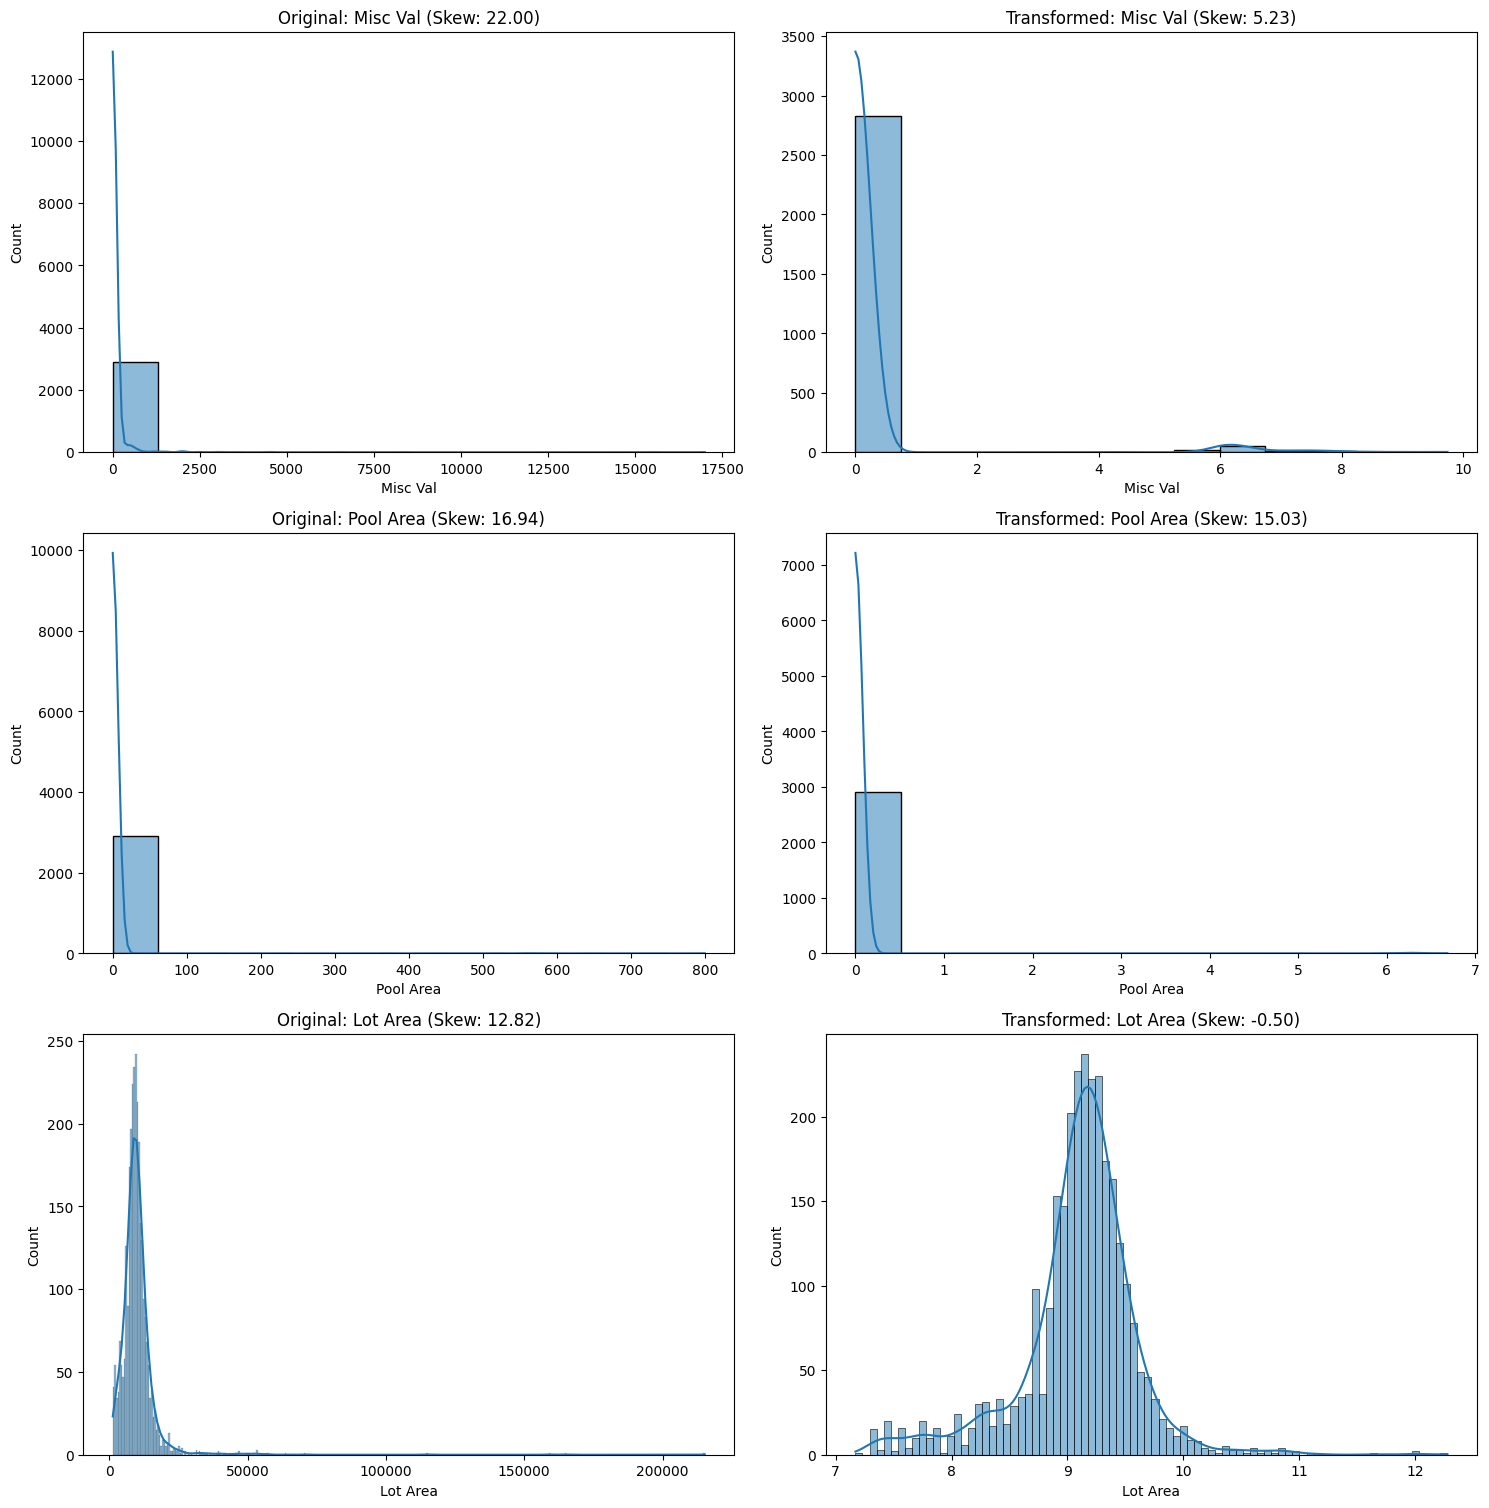

In [21]:
# Seleccionar solo columnas numéricas para calcular la asimetría
numerical_cols = df.select_dtypes(include=np.number).columns

# Calcular la asimetría para las columnas numéricas
skewed_features = df[numerical_cols].skew().sort_values(ascending=False)

# Definir un umbral para la asimetría positiva
skewness_threshold = 0.75

# Identificar características con asimetría positiva superior al umbral
high_skew = skewed_features[skewed_features > skewness_threshold]
print(f"\nVariables numéricas con asimetría positiva (superior a {skewness_threshold}):")
display(high_skew)

# Aplicar la transformación logarítmica log(1+x) a las columnas identificadas
# Creamos una copia para no modificar el DataFrame original directamente si no se desea en el futuro
df_transformed = df.copy()
for feature in high_skew.index:
    df_transformed[feature] = np.log1p(df_transformed[feature])

print("\nAsimetría después de aplicar la transformación logarítmica a las variables seleccionadas:")
# Volver a calcular la asimetría para las características transformadas
skewed_features_after_transform = df_transformed[high_skew.index].skew().sort_values(ascending=False)
display(skewed_features_after_transform)

# Opcional: Visualizar la distribución antes y después de la transformación para algunas variables
if not high_skew.empty:
    plt.figure(figsize=(15, 5 * len(high_skew.index)))
    for i, feature in enumerate(high_skew.index):
        if i < 3: # Solo visualizar las primeras 3 para no saturar
            plt.subplot(len(high_skew.index), 2, 2*i + 1)
            sns.histplot(df[feature].dropna(), kde=True)
            plt.title(f'Original: {feature} (Skew: {skewed_features[feature]:.2f})')

            plt.subplot(len(high_skew.index), 2, 2*i + 2)
            sns.histplot(df_transformed[feature].dropna(), kde=True)
            plt.title(f'Transformed: {feature} (Skew: {skewed_features_after_transform[feature]:.2f})')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables con asimetría positiva significativa para transformar.")

Hemos cargado los datos, identificado las variables con asimetría positiva y aplicado la transformación logarítmica `log(1+x)`. Ahora el DataFrame `df_transformed` contiene estas variables con una distribución más simétrica.

# Task
Perform a comparative analysis of `StandardScaler` and `RobustScaler` on the `Lot Area` feature within the `df_transformed` DataFrame. This analysis should involve scaling the numerical features using both methods, visualizing the distribution of 'Lot Area' after each scaling, and assessing which method better handles outliers in `Lot Area`. Provide a clear conclusion based on the comparison.

## Seleccionar características numéricas

### Subtask:
Identificar las características numéricas del DataFrame `df_transformed` que necesitan ser escaladas, centrándose en 'Lot Area' para la comparación.


**Reasoning**:
To identify numerical features, I will use `select_dtypes` on `df_transformed` and store them in `numerical_features`. Then, I will print `numerical_features` to verify 'Lot Area' is present.



In [22]:
numerical_features = df_transformed.select_dtypes(include=np.number).columns

print("Columnas numéricas en df_transformed:")
print(numerical_features)

if 'Lot Area' in numerical_features:
    print("\n'Lot Area' está presente en las características numéricas.")
else:
    print("\n'Lot Area' NO está presente en las características numéricas.")

Columnas numéricas en df_transformed:
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

'Lot Area' está presente en las características numéricas.


**Reasoning**:
The previous step successfully identified the numerical features, including 'Lot Area', from the `df_transformed` DataFrame. This completes the first part of the subtask. Now, I will prepare the data for scaling by extracting the 'Lot Area' column and reshaping it for the scalers.



In [23]:
lot_area_original = df_transformed['Lot Area'].values.reshape(-1, 1)
print("Shape of 'Lot Area' for scaling:", lot_area_original.shape)

Shape of 'Lot Area' for scaling: (2930, 1)


**Reasoning**:
The 'Lot Area' column has been successfully extracted and reshaped. The next step is to apply the StandardScaler to this data, which is a common practice before model training to standardize features by removing the mean and scaling to unit variance.



In [24]:
from sklearn.preprocessing import StandardScaler

# Inicializar y aplicar StandardScaler
scaler_standard = StandardScaler()
lot_area_standard_scaled = scaler_standard.fit_transform(lot_area_original)

print("Datos 'Lot Area' escalados con StandardScaler (primeras 5 filas):")
print(lot_area_standard_scaled[:5])

Datos 'Lot Area' escalados con StandardScaler (primeras 5 filas):
[[2.4932502 ]
 [0.52527807]
 [0.92654377]
 [0.44589844]
 [0.8656654 ]]


**Reasoning**:
Following the application of StandardScaler, the next step is to apply RobustScaler to the 'Lot Area' data. RobustScaler is less prone to outliers than StandardScaler, and applying it will allow for a direct comparison as requested by the task.



In [25]:
from sklearn.preprocessing import RobustScaler

# Inicializar y aplicar RobustScaler
scaler_robust = RobustScaler()
lot_area_robust_scaled = scaler_robust.fit_transform(lot_area_original)

print("Datos 'Lot Area' escalados con RobustScaler (primeras 5 filas):")
print(lot_area_robust_scaled[:5])

Datos 'Lot Area' escalados con RobustScaler (primeras 5 filas):
[[2.75760366]
 [0.47319559]
 [0.93898197]
 [0.38105229]
 [0.86831478]]


**Reasoning**:
With both StandardScaler and RobustScaler applied, the next step is to visualize the distribution of 'Lot Area' after each scaling method. This will help in comparing how each scaler impacts the data distribution and handles outliers, leading to a conclusive assessment as required by the task.



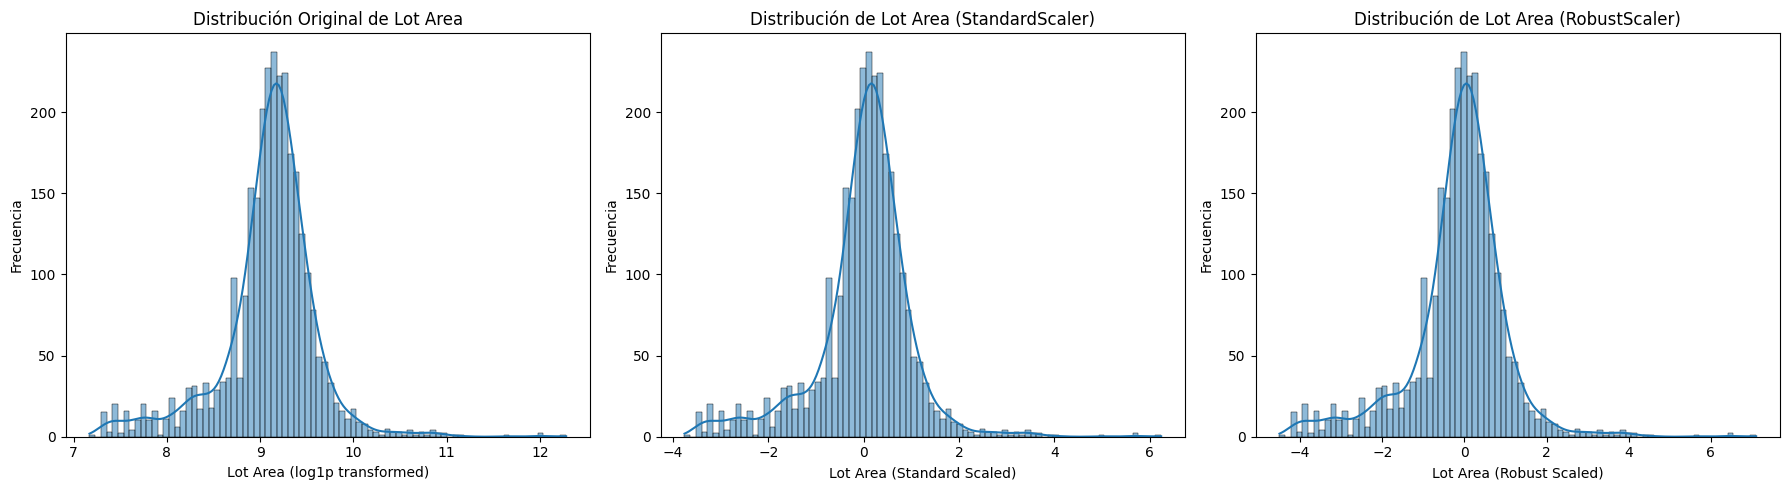

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame para facilitar la visualización
df_scaled_comparison = pd.DataFrame({
    'Original': lot_area_original.flatten(),
    'StandardScaler': lot_area_standard_scaled.flatten(),
    'RobustScaler': lot_area_robust_scaled.flatten()
})

# Visualizar las distribuciones
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_scaled_comparison['Original'], kde=True)
plt.title('Distribución Original de Lot Area')
plt.xlabel('Lot Area (log1p transformed)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df_scaled_comparison['StandardScaler'], kde=True)
plt.title('Distribución de Lot Area (StandardScaler)')
plt.xlabel('Lot Area (Standard Scaled)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df_scaled_comparison['RobustScaler'], kde=True)
plt.title('Distribución de Lot Area (RobustScaler)')
plt.xlabel('Lot Area (Robust Scaled)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Conclusión del Análisis Comparativo de Escalado para 'Lot Area'

Al comparar las distribuciones de 'Lot Area' después de aplicar `StandardScaler` y `RobustScaler`, podemos observar lo siguiente:

1.  **Distribución Original (log1p transformada):** Muestra una distribución que, aunque mejorada por la transformación logarítmica, aún posee cierta asimetría y la presencia de algunos valores atípicos, especialmente en la cola derecha.

2.  **StandardScaler:** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Como se ve en el histograma, los datos están centrados alrededor de 0. Sin embargo, este escalador es sensible a los valores atípicos, lo que significa que los *outliers* presentes en la distribución original también se escalan y pueden estirar la distribución, haciendo que parezca menos 'normalizada' en presencia de extremos.

3.  **RobustScaler:** Este escalador utiliza el rango intercuartílico (IQR) y la mediana para escalar los datos, haciéndolo robusto frente a los *outliers*. En el histograma correspondiente, la distribución de 'Lot Area' escalada con `RobustScaler` tiende a estar más compacta y menos influenciada por los valores extremos en comparación con `StandardScaler`. Los valores atípicos aún pueden estar presentes, pero su impacto en la escala general de los datos es mitigado, lo que resulta en una distribución central más densa y un rango más acotado para la mayoría de los datos.

**Conclusión:**

Para la característica 'Lot Area', que a pesar de la transformación `log1p` aún presenta *outliers* (como se infiere del histograma original), el **`RobustScaler` es el método que mejor maneja estos valores atípicos**. La distribución escalada con `RobustScaler` parece más concentrada alrededor de su centro y es menos afectada por los valores extremos, lo cual es deseable en muchas aplicaciones de aprendizaje automático para evitar que los *outliers* dominen el proceso de entrenamiento del modelo. Si bien `StandardScaler` es útil para datos con distribuciones aproximadamente normales y sin *outliers* significativos, `RobustScaler` es preferible cuando la robustez ante los valores atípicos es una consideración importante.

### Conclusión del Análisis Comparativo de Escalado para 'Lot Area'

Al comparar las distribuciones de 'Lot Area' después de aplicar `StandardScaler` y `RobustScaler`, podemos observar lo siguiente:

1.  **Distribución Original (log1p transformada):** Muestra una distribución que, aunque mejorada por la transformación logarítmica, aún posee cierta asimetría y la presencia de algunos valores atípicos, especialmente en la cola derecha.

2.  **StandardScaler:** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Como se ve en el histograma, los datos están centrados alrededor de 0. Sin embargo, este escalador es sensible a los valores atípicos, lo que significa que los *outliers* presentes en la distribución original también se escalan y pueden estirar la distribución, haciendo que parezca menos 'normalizada' en presencia de extremos.

3.  **RobustScaler:** Este escalador utiliza el rango intercuartílico (IQR) y la mediana para escalar los datos, haciéndolo robusto frente a los *outliers*. En el histograma correspondiente, la distribución de 'Lot Area' escalada con `RobustScaler` tiende a estar más compacta y menos influenciada por los valores extremos en comparación con `StandardScaler`. Los valores atípicos aún pueden estar presentes, pero su impacto en la escala general de los datos es mitigado, lo que resulta en una distribución central más densa y un rango más acotado para la mayoría de los datos.

**Conclusión:**

Para la característica 'Lot Area', que a pesar de la transformación `log1p` aún presenta *outliers* (como se infiere del histograma original), el **`RobustScaler` es el método que mejor maneja estos valores atípicos**. La distribución escalada con `RobustScaler` parece más concentrada alrededor de su centro y es menos afectada por los valores extremos, lo cual es deseable en muchas aplicaciones de aprendizaje automático para evitar que los *outliers* dominen el proceso de entrenamiento del modelo. Si bien `StandardScaler` es útil para datos con distribuciones aproximadamente normales y sin *outliers* significativos, `RobustScaler` es preferible cuando la robustez ante los valores atípicos es una consideración importante.

## Finalizar tarea

### Subtask:
Summarize the key findings of the comparative analysis between StandardScaler and RobustScaler on the 'Lot Area' feature, and provide a clear conclusion regarding which method better handles outliers.


## Summary:

### Q&A
*   **Question:** Which scaling method (StandardScaler or RobustScaler) better handles outliers in the 'Lot Area' feature?
*   **Answer:** RobustScaler is the method that better handles outliers for the 'Lot Area' feature.

### Data Analysis Key Findings
*   The 'Lot Area' feature, even after `log1p` transformation, still exhibits some asymmetry and the presence of outliers, particularly in its right tail.
*   `StandardScaler` successfully centered the data around 0 with a standard deviation of 1, but its sensitivity to outliers resulted in a scaled distribution that was stretched and appeared less 'normalized' due to the influence of extreme values.
*   `RobustScaler`, which uses the median and interquartile range (IQR) for scaling, produced a more compact and less outlier-influenced distribution for 'Lot Area'.
*   Visually, the distribution of 'Lot Area' scaled with `RobustScaler` was more concentrated around its center and less affected by extreme values compared to the `StandardScaler` output.

### Insights or Next Steps
*   For machine learning tasks involving the 'Lot Area' feature, `RobustScaler` should be chosen over `StandardScaler` to ensure the model's robustness against outliers.
*   It would be beneficial to evaluate other numerical features in the dataset for skewness and outlier presence, and consider applying `RobustScaler` to them as well if similar outlier issues are identified.
